## References

1. https://github.com/Mayurji/Image-Classification-PyTorch/blob/main/VGG.py

## 1) lib import

In [14]:
import torch
import numpy as np
import torch.nn as nn

print(f'pytorch version : {torch.__version__}')
print(f'numpy version : {np.__version__}')

pytorch version : 1.13.1+cpu
numpy version : 1.21.6


## 2) VGG architecture

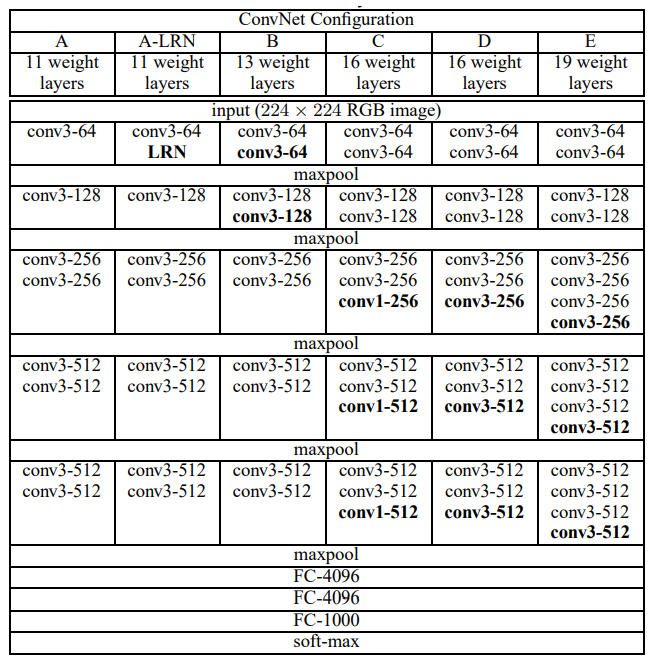

## 3) VGG16

In [2]:
class VGG16(nn.Module):
    def __init__(self, num_classes, num_channels, num_layers, num_filters):
        super().__init__()
        self.classes = num_classes
        self.input_channels = num_channels
        
        conv_blcks = []
        for num_convs, filters in zip(num_layers, num_filters):
            conv_blcks.append(self.vgg_block(num_convs, self.input_channels, 64 * filters))
            self.input_channel = 64 * filters
            
        self.layers = nn.Sequential(
            *conv_blcks, 
            nn.Flatten(),
            nn.Linear((7 * 7 * 512), 4096),
            nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(4096, self.classes))
        
    def vgg_block(self, num_convs, in_channels, out_channels):
        layers = []
        for _ in range(num_convs):
            layers.append(nn.Conv2d(self.input_channels, out_channels, kernel_size=3, padding=1))
            layers.append(nn.ReLU())
            self.input_channels = out_channels

        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.layers(x)
        return out

In [3]:
model = VGG16(100, 3, [2, 2, 3, 3, 3], [1, 2, 4, 8, 8])
model

VGG16(
  (layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, pad

In [4]:
input = torch.randn(1, 3, 224, 224)
model(input).shape

torch.Size([1, 100])

## 4) VGG19

In [5]:
class VGG19(nn.Module):
    def __init__(self, num_classes, num_channels, num_layers, num_filters):
        super().__init__()
        self.classes = num_classes
        self.input_channels = num_channels
        
        conv_blcks = []
        for num_convs, filters in zip(num_layers, num_filters):
            conv_blcks.append(self.vgg_block(num_convs, self.input_channels, 64 * filters))
            self.input_channel = 64 * filters
            
        self.layers = nn.Sequential(
            *conv_blcks, 
            nn.Flatten(),
            nn.Linear((7 * 7 * 512), 4096),
            nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(4096, self.classes))
        
    def vgg_block(self, num_convs, in_channels, out_channels):
        layers = []
        for _ in range(num_convs):
            layers.append(nn.Conv2d(self.input_channels, out_channels, kernel_size=3, padding=1))
            layers.append(nn.ReLU())
            self.input_channels = out_channels

        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.layers(x)
        return out

In [6]:
model = VGG19(100, 3, [2, 2, 4, 4, 4], [1, 2, 4, 8, 8])
model

VGG19(
  (layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): Conv2d(256, 256, kernel_size=(3, 3), s

In [7]:
input = torch.randn(1, 3, 224, 224)
model(input).shape

torch.Size([1, 100])

## 5) Advanced VGG16

In [8]:
class advanced_VGG16(nn.Module):
    def __init__(self, num_classes, num_channels, num_layers, num_filters):
        super().__init__()
        self.classes = num_classes
        self.input_channels = num_channels
        
        conv_blcks = []
        for num_convs, filters in zip(num_layers, num_filters):
            conv_blcks.append(self.vgg_block(num_convs, self.input_channels, 64 * filters))
            self.input_channel = 64 * filters
            
        self.layers = nn.Sequential(
            *conv_blcks, 
            nn.Flatten(),
            nn.Linear((7 * 7 * 512), 4096),
            nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(4096, self.classes))
        
    def vgg_block(self, num_convs, in_channels, out_channels):
        layers = []
        for _ in range(num_convs):
            layers.append(nn.Conv2d(self.input_channels, out_channels, kernel_size=3, padding=1))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU())
            self.input_channels = out_channels

        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.layers(x)
        return out

In [9]:
model = advanced_VGG16(100, 3, [2, 2, 4, 4, 4], [1, 2, 4, 8, 8])
model

advanced_VGG16(
  (layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode

In [10]:
input = torch.randn(1, 3, 224, 224)
model(input).shape

torch.Size([1, 100])

## Advanced VGG19

In [11]:
class advanced_VGG19(nn.Module):
    def __init__(self, num_classes, num_channels, num_layers, num_filters):
        super().__init__()
        self.classes = num_classes
        self.input_channels = num_channels
        
        conv_blcks = []
        for num_convs, filters in zip(num_layers, num_filters):
            conv_blcks.append(self.vgg_block(num_convs, self.input_channels, 64 * filters))
            self.input_channel = 64 * filters
            
        self.layers = nn.Sequential(
            *conv_blcks, 
            nn.Flatten(),
            nn.Linear((7 * 7 * 512), 4096),
            nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(4096, self.classes))
        
    def vgg_block(self, num_convs, in_channels, out_channels):
        layers = []
        for _ in range(num_convs):
            layers.append(nn.Conv2d(self.input_channels, out_channels, kernel_size=3, padding=1))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU())
            self.input_channels = out_channels

        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.layers(x)
        return out

In [12]:
model = advanced_VGG19(100, 3, [2, 2, 4, 4, 4], [1, 2, 4, 8, 8])
model

advanced_VGG19(
  (layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode

In [13]:
input = torch.randn(1, 3, 224, 224)
model(input).shape

torch.Size([1, 100])